<a href="https://colab.research.google.com/github/prateekk21/ipl-t20-cricket-analysis/blob/main/Prateek_Arora_IPL_T20_Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir =  '/content/drive/MyDrive/AlmaBetter/Month 1/EDA/'

In [3]:
players_df = pd.read_excel(dir + 'Players.xlsx')
deliveries_df = pd.read_csv(dir + 'deliveries.csv')
matches_df = pd.read_csv(dir+'matches.csv')
most_runs_df = pd.read_csv(dir+'most_runs_average_strikerate.csv')
teams_df = pd.read_csv(dir+'teams.csv')
teamwise_home_away_df = pd.read_csv(dir+'teamwise_home_and_away.csv')

In [4]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


## Let's check how many players are left handed and right handed

In [5]:
players_df['Batting_Hand'].replace('Right_hand', 'Right_Hand', inplace=True)

In [6]:
players_df['Batting_Hand'].value_counts()

Right_Hand    421
Left_Hand     142
Name: Batting_Hand, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


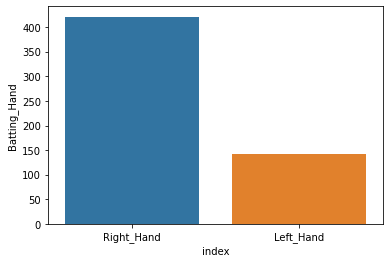

In [7]:
sns.barplot('index', 'Batting_Hand', data=players_df['Batting_Hand'].value_counts().reset_index())

In [8]:
players_df['Bowling_Skill'].value_counts()

Right-arm medium          107
Right-arm offbreak         91
Right-arm fast-medium      68
Slow left-arm orthodox     50
Right-arm fast             39
Right-arm medium-fast      38
Legbreak                   30
Legbreak googly            28
Left-arm fast-medium       19
Left-arm medium            11
Left-arm medium-fast        9
Slow left-arm chinaman      5
Left-arm fast               4
Right-arm bowler            1
Right-arm Fast              1
Right-arm Medium            1
Name: Bowling_Skill, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


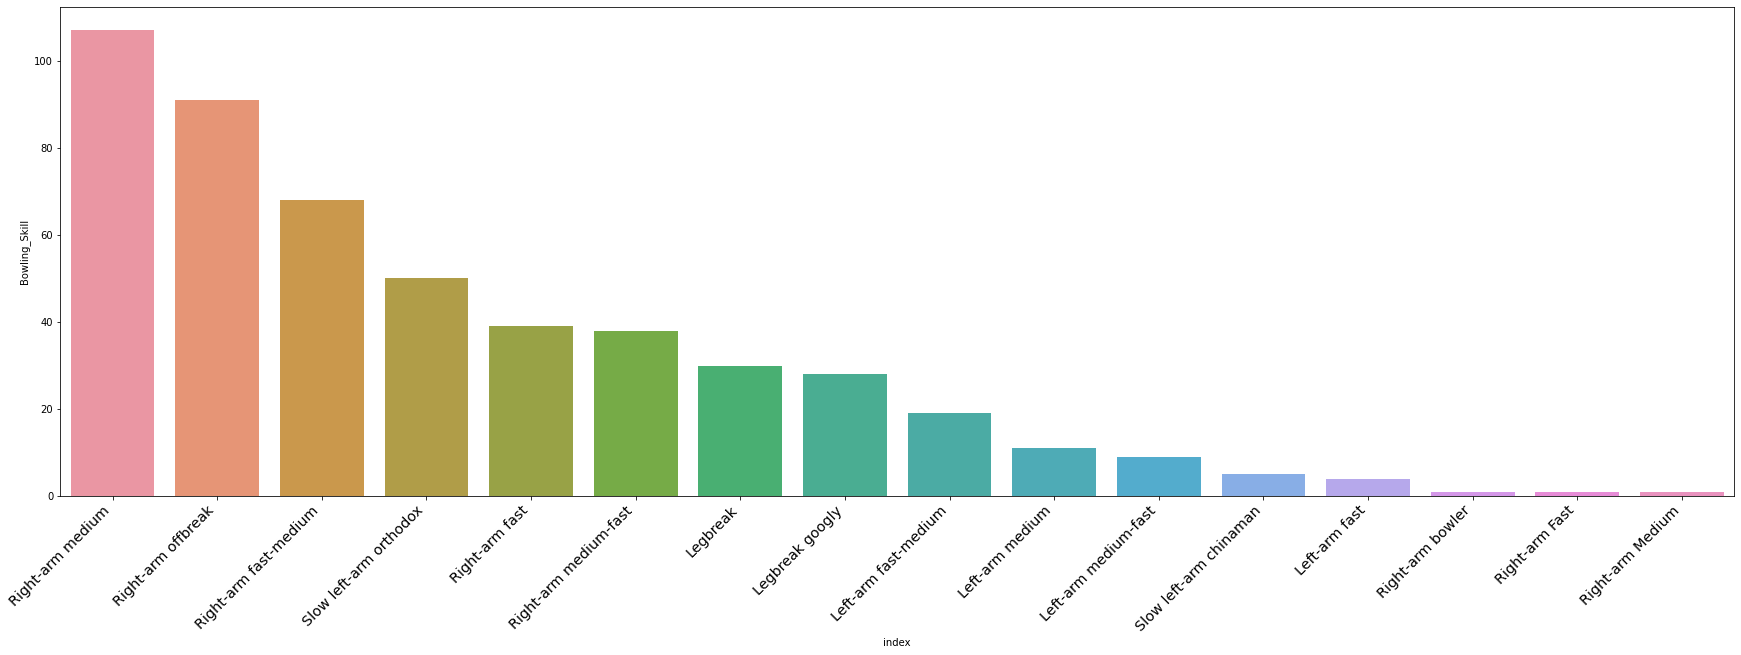

In [9]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Bowling_Skill', data=players_df['Bowling_Skill'].value_counts().reset_index())

In [10]:
players_df['Country'].value_counts()

India           264
Australia        72
South Africa     39
New Zealand      22
Sri Lanka        20
West Indies      19
England          14
Pakistan         13
Bangladesh        5
Zimbabwea         2
Netherlands       1
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


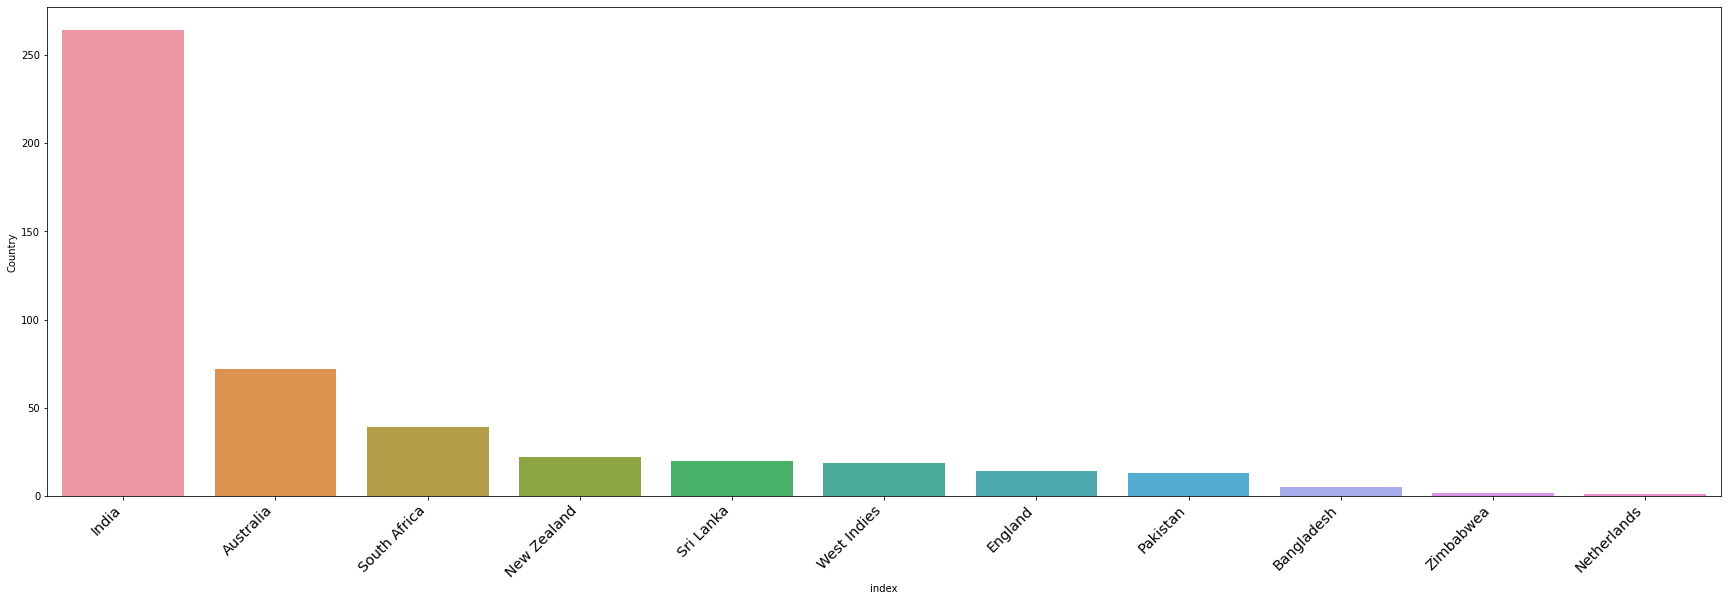

In [11]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Country', data=players_df['Country'].value_counts().reset_index())

In [12]:
deliveries_df[deliveries_df['match_id']==1]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [13]:
deliveries_df_1 = deliveries_df.groupby('batsman').agg({'batsman_runs': sum}).reset_index()

In [14]:
deliveries_df_1.sort_values(by=['batsman_runs'], ascending=False, inplace=True)

## Top 10 most scorer Batsman

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


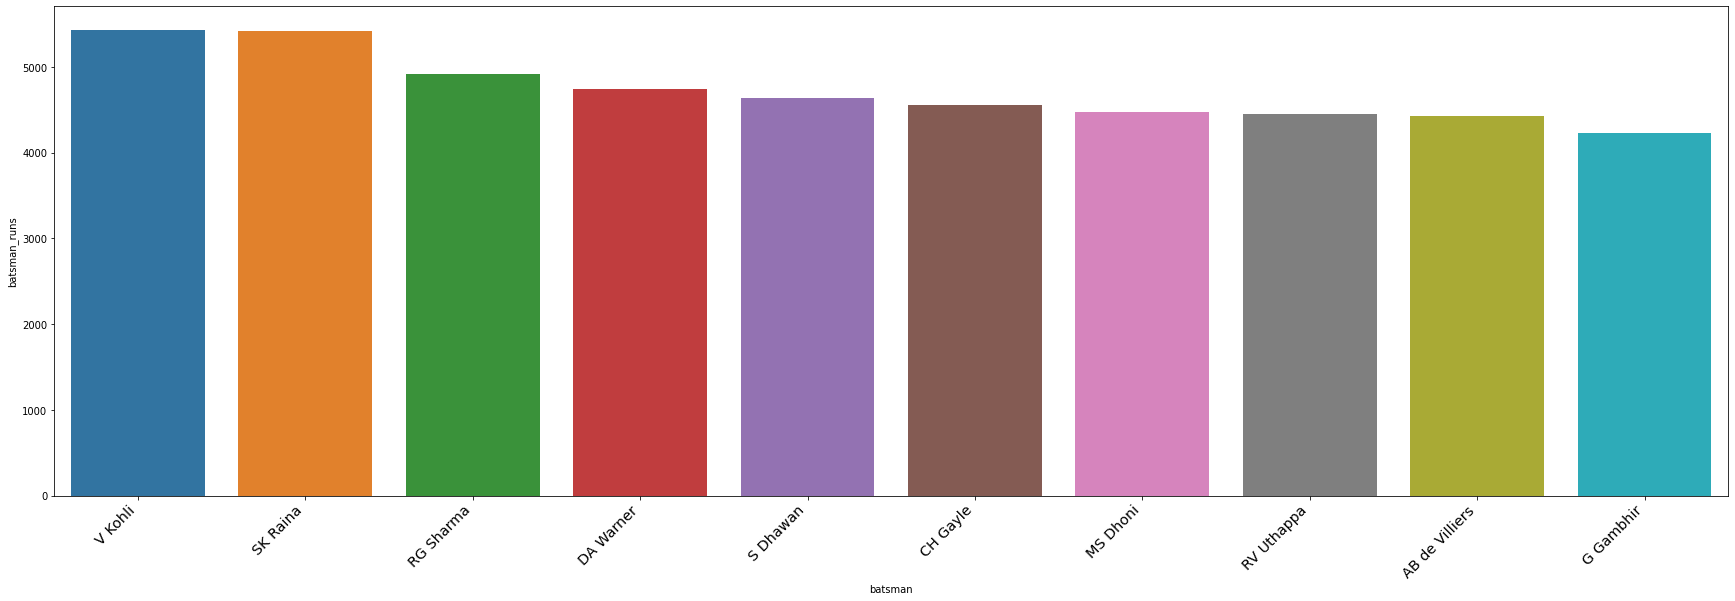

In [15]:
plt.figure(figsize=(30,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('batsman', 'batsman_runs', data=deliveries_df_1.head(10))

## How many matches we have in this dataset

In [16]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [17]:
len(matches_df['id'])

756

## How many seasons in this dataset

In [18]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [19]:
len(matches_df['Season'].unique())

12

## Which team won by maximum runs

In [45]:
matches_df1 = matches_df.sort_values(by=['win_by_runs'], ascending = False).reset_index()

In [46]:
matches_df1.head()

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,43,44,IPL-2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
1,619,620,IPL-2016,Bangalore,14-05-2016,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
2,59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
3,556,557,IPL-2015,Bangalore,06-05-2015,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
4,410,411,IPL-2013,Bangalore,23-04-2013,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN


In [47]:
matches_df1['winner'][matches_df['win_by_runs'].idxmax()]

'Mumbai Indians'

## Which team won by maximum wickets

In [24]:
matches_df2 = matches_df.sort_values(by=['win_by_wickets'], ascending = False).reset_index()

In [27]:
matches_df['winner'][matches_df['win_by_wickets'].idxmax()]

'Kolkata Knight Riders'

## Which team won by closest margin (min runs)

In [49]:
matches_df3 = matches_df[matches_df['win_by_runs']==1]
matches_df3['winner'][matches_df3['win_by_runs'].idxmax()]

'Mumbai Indians'

## Which team won by min wickets

In [50]:
matches_df4 = matches_df[matches_df['win_by_wickets']==1]
matches_df4['winner'][matches_df4['win_by_wickets'].idxmax()]

'Kolkata Knight Riders'

##No of matches in season

In [54]:
matches_df['Season'].value_counts().reset_index()

,index,Season
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2014,60
4,IPL-2016,60
5,IPL-2018,60
6,IPL-2019,60
7,IPL-2010,60
8,IPL-2017,59
9,IPL-2015,59


In [63]:
matches_df['Season_year'] = matches_df['Season'].apply(lambda x: x[-4:])

In [72]:
matches_df_2 = matches_df['Season_year'].value_counts().reset_index()

In [74]:
matches_df_2.sort_values(by=['index'])

,index,Season_year
10,2008,58
11,2009,57
6,2010,60
2,2011,73
1,2012,74
0,2013,76
4,2014,60
9,2015,59
5,2016,60
8,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


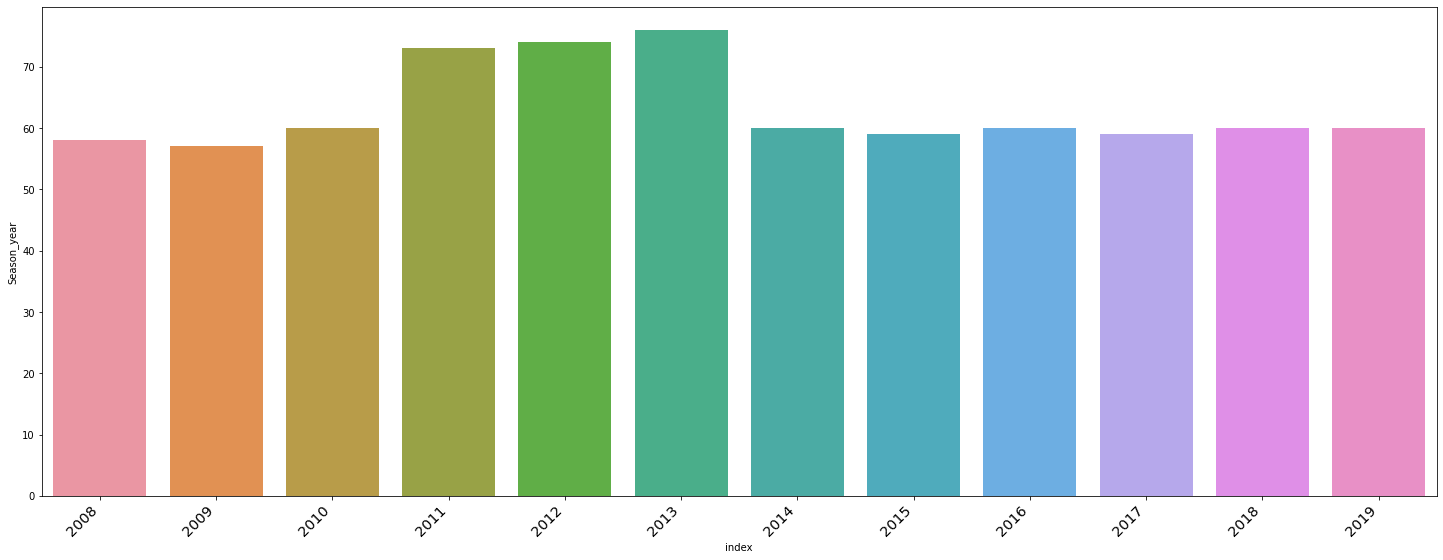

In [76]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'Season_year', data=matches_df_2.sort_values(by=['index']))

## Which team won match after winning toss

In [77]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season_year
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017


In [78]:
matches_df['won_after_winning_toss'] = matches_df['toss_winner']==matches_df['winner']

In [79]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Season_year,won_after_winning_toss
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,False
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,True
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,True
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,True
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,True


In [82]:
matches_df['won_after_winning_toss'].value_counts().reset_index()

,index,won_after_winning_toss
0,True,393
1,False,363


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


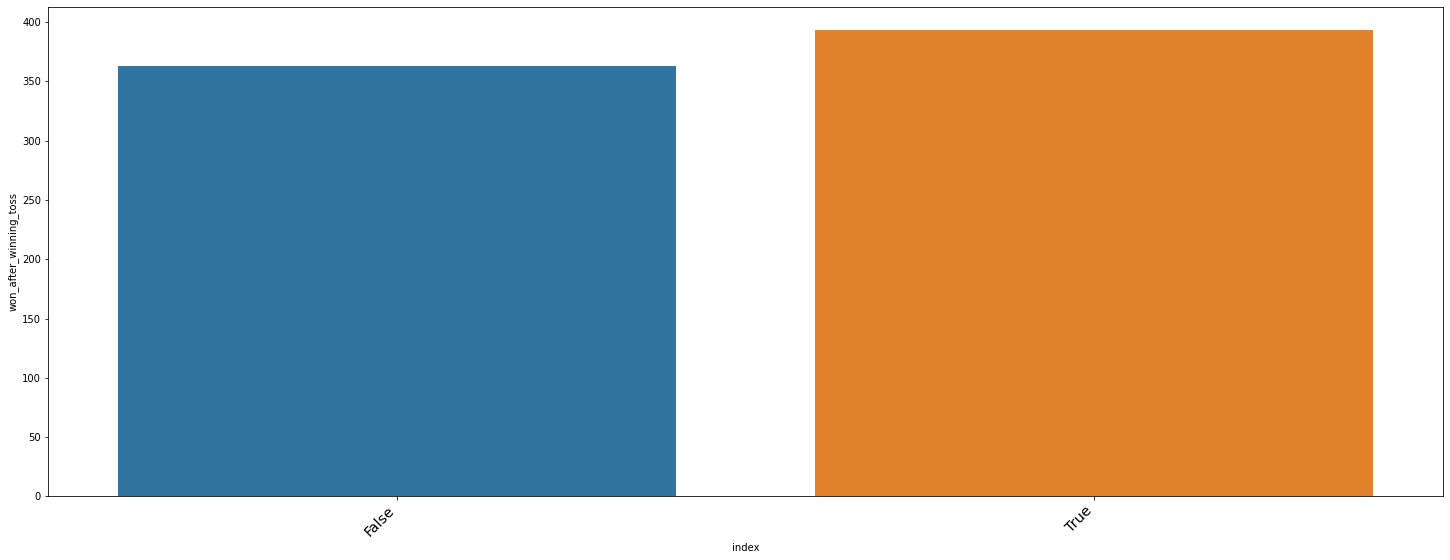

In [83]:
plt.figure(figsize=(25,9))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
sns.barplot('index', 'won_after_winning_toss', data=matches_df['won_after_winning_toss'].value_counts().reset_index())